In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from stock_American_new import GBM_stock
from tqdm import trange
from utils_american import episodes_50_gbm_american
import random
import matplotlib.pyplot as plt
from ddpg import ddpgAgent

In [2]:
eposide = 15000
random.seed(24)

ddpg_agent = ddpgAgent(alpha=0.0003, beta=0.0003, input_dim=[2], tau=0.001)

best_test_50 = -100

test_scores_ddpg = []
for i in trange(eposide):

    env = GBM_stock(S0=50, K=50, rf=0.05, sigma=0.3, n_step=60)
    done = False
    already_strike = False
    score = 0
    state = env.reset()
    while not done:
        action = ddpg_agent.choose_action(state)
        next_state, reward, done, already_strike = env.step(action, already_strike)
        ddpg_agent.remember(state, action, reward, next_state, int(done))
        ddpg_agent.learn()
        score += reward
        state = next_state

    # score_history.append(score)
    if (i+1) % 100 == 0:
        test_50 = episodes_50_gbm_american(ddpg_agent, S=50, K=50, r=0.05, sigma=0.3, n_step=60)
        print('episode ', i, 'score %.2f' % score,
              '50 test average score %.2f' % test_50)

        if test_50 > best_test_50:
            best_test_50 = test_50
            ddpg_agent.save_models()

        test_scores_ddpg.append(test_50)
        if abs(test_50) < 0.1:
            print('Finish training early')
            break

  0%|                                                 | 0/15000 [00:00<?, ?it/s]/Users/faroldfry/Desktop/Term2/MAFS5370/Ass2/rl_assignment2 3/ddpg.py:204: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1678454847243/work/torch/csrc/utils/tensor_new.cpp:248.)
  action = torch.tensor(action, dtype=torch.float).to(self.critic.device)
  1%|▏                                    | 100/15000 [00:35<2:23:24,  1.73it/s]

exercise early average at time 39.33333333333325 early exercise ratio is 0.6
episode  99 score -8.45 50 test average score -10.08
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  1%|▍                                    | 200/15000 [01:12<2:26:37,  1.68it/s]

exercise early average at time 36.61904761904753 early exercise ratio is 0.42
episode  199 score -5.98 50 test average score -7.72
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  2%|▋                                    | 300/15000 [01:49<2:26:20,  1.67it/s]

exercise early average at time 32.08695652173904 early exercise ratio is 0.46
episode  299 score -16.21 50 test average score -8.29


  3%|▉                                    | 400/15000 [02:25<2:29:29,  1.63it/s]

exercise early average at time 32.319999999999915 early exercise ratio is 0.5
episode  399 score -9.18 50 test average score -5.05
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  3%|█▏                                   | 500/15000 [03:01<2:23:35,  1.68it/s]

exercise early average at time 36.87499999999991 early exercise ratio is 0.48
episode  499 score -6.05 50 test average score -3.72
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  4%|█▍                                   | 600/15000 [03:40<2:41:00,  1.49it/s]

exercise early average at time 32.54166666666658 early exercise ratio is 0.48
episode  599 score -5.30 50 test average score -3.57
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  5%|█▋                                   | 700/15000 [04:21<2:37:24,  1.51it/s]

exercise early average at time 37.49999999999991 early exercise ratio is 0.52
episode  699 score -4.66 50 test average score -5.18


  5%|█▉                                   | 800/15000 [05:02<2:39:35,  1.48it/s]

exercise early average at time 44.23999999999991 early exercise ratio is 0.5
episode  799 score -6.80 50 test average score -3.25
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  6%|██▏                                  | 900/15000 [05:43<2:39:56,  1.47it/s]

exercise early average at time 33.86363636363627 early exercise ratio is 0.44
episode  899 score -5.57 50 test average score -3.34


  7%|██▍                                 | 1000/15000 [06:24<2:35:33,  1.50it/s]

exercise early average at time 37.590909090908994 early exercise ratio is 0.44
episode  999 score -5.14 50 test average score -3.19
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  7%|██▋                                 | 1100/15000 [07:05<2:35:38,  1.49it/s]

exercise early average at time 37.478260869565126 early exercise ratio is 0.46
episode  1099 score -7.70 50 test average score -3.65


  8%|██▉                                 | 1200/15000 [07:46<2:31:35,  1.52it/s]

exercise early average at time 39.21428571428563 early exercise ratio is 0.56
episode  1199 score -10.16 50 test average score -3.70


  9%|███                                 | 1300/15000 [08:27<2:29:01,  1.53it/s]

exercise early average at time 37.46428571428562 early exercise ratio is 0.56
episode  1299 score -1.62 50 test average score -2.75
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  9%|███▎                                | 1400/15000 [09:08<2:27:40,  1.53it/s]

exercise early average at time 39.41666666666657 early exercise ratio is 0.48
episode  1399 score -5.14 50 test average score -3.73


 10%|███▌                                | 1500/15000 [09:48<2:25:29,  1.55it/s]

exercise early average at time 37.090909090908994 early exercise ratio is 0.44
episode  1499 score -15.02 50 test average score -3.51


 11%|███▊                                | 1600/15000 [10:29<2:28:59,  1.50it/s]

exercise early average at time 42.449999999999896 early exercise ratio is 0.4
episode  1599 score -1.50 50 test average score -3.75


 11%|████                                | 1700/15000 [11:10<2:27:28,  1.50it/s]

exercise early average at time 35.11111111111102 early exercise ratio is 0.36
episode  1699 score -5.37 50 test average score -2.78


 12%|████▎                               | 1800/15000 [11:51<2:25:15,  1.51it/s]

exercise early average at time 40.159999999999904 early exercise ratio is 0.5
episode  1799 score -3.24 50 test average score -3.27


 13%|████▌                               | 1900/15000 [12:32<2:22:46,  1.53it/s]

exercise early average at time 37.39999999999991 early exercise ratio is 0.6
episode  1899 score -6.64 50 test average score -2.80


 13%|████▊                               | 2000/15000 [13:13<2:22:14,  1.52it/s]

exercise early average at time 35.39999999999992 early exercise ratio is 0.5
episode  1999 score -8.19 50 test average score -3.93


 14%|█████                               | 2100/15000 [13:54<2:24:11,  1.49it/s]

exercise early average at time 42.65384615384607 early exercise ratio is 0.52
episode  2099 score -5.61 50 test average score -3.02


 15%|█████▎                              | 2200/15000 [14:35<2:23:16,  1.49it/s]

exercise early average at time 33.43478260869556 early exercise ratio is 0.46
episode  2199 score -5.16 50 test average score -2.67
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 15%|█████▌                              | 2300/15000 [15:19<2:31:34,  1.40it/s]

exercise early average at time 40.1999999999999 early exercise ratio is 0.4
episode  2299 score -6.73 50 test average score -3.03


 16%|█████▊                              | 2400/15000 [16:04<2:27:03,  1.43it/s]

exercise early average at time 39.61538461538452 early exercise ratio is 0.52
episode  2399 score -6.49 50 test average score -3.78


 17%|██████                              | 2500/15000 [16:47<2:25:13,  1.43it/s]

exercise early average at time 40.14285714285705 early exercise ratio is 0.42
episode  2499 score -19.66 50 test average score -2.74


 17%|██████▏                             | 2600/15000 [17:31<2:26:50,  1.41it/s]

exercise early average at time 38.655172413793025 early exercise ratio is 0.58
episode  2599 score -8.84 50 test average score -3.99


 18%|██████▍                             | 2700/15000 [18:15<2:22:35,  1.44it/s]

exercise early average at time 35.33333333333324 early exercise ratio is 0.54
episode  2699 score -4.29 50 test average score -2.84


 19%|██████▋                             | 2800/15000 [18:57<2:13:09,  1.53it/s]

exercise early average at time 37.24999999999991 early exercise ratio is 0.4
episode  2799 score -2.85 50 test average score -2.91


 19%|██████▉                             | 2900/15000 [19:37<2:10:00,  1.55it/s]

exercise early average at time 39.482758620689566 early exercise ratio is 0.58
episode  2899 score -2.29 50 test average score -4.35


 20%|███████▏                            | 3000/15000 [20:17<2:09:11,  1.55it/s]

exercise early average at time 36.956521739130345 early exercise ratio is 0.46
episode  2999 score -2.18 50 test average score -2.61
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 21%|███████▍                            | 3100/15000 [20:58<2:09:55,  1.53it/s]

exercise early average at time 36.36842105263149 early exercise ratio is 0.38
episode  3099 score -1.95 50 test average score -2.66


 21%|███████▋                            | 3200/15000 [21:38<2:08:08,  1.53it/s]

exercise early average at time 43.636363636363534 early exercise ratio is 0.44
episode  3199 score -6.82 50 test average score -2.65


 22%|███████▉                            | 3300/15000 [22:18<2:06:17,  1.54it/s]

exercise early average at time 39.9499999999999 early exercise ratio is 0.4
episode  3299 score -8.54 50 test average score -2.34
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 23%|████████▏                           | 3400/15000 [22:58<2:03:56,  1.56it/s]

exercise early average at time 33.999999999999915 early exercise ratio is 0.54
episode  3399 score -5.82 50 test average score -2.97


 23%|████████▍                           | 3500/15000 [23:38<2:03:30,  1.55it/s]

exercise early average at time 35.95833333333325 early exercise ratio is 0.48
episode  3499 score -5.09 50 test average score -2.92


 24%|████████▋                           | 3600/15000 [24:18<2:02:10,  1.56it/s]

exercise early average at time 37.1904761904761 early exercise ratio is 0.42
episode  3599 score -3.64 50 test average score -3.25


 25%|████████▉                           | 3700/15000 [24:58<2:05:18,  1.50it/s]

exercise early average at time 40.695652173912954 early exercise ratio is 0.46
episode  3699 score -4.72 50 test average score -3.54


 25%|█████████                           | 3800/15000 [25:38<2:00:42,  1.55it/s]

exercise early average at time 32.86363636363628 early exercise ratio is 0.44
episode  3799 score -6.11 50 test average score -3.13


 26%|█████████▎                          | 3900/15000 [26:18<1:59:05,  1.55it/s]

exercise early average at time 40.909090909090814 early exercise ratio is 0.44
episode  3899 score -2.21 50 test average score -4.20


 27%|█████████▌                          | 4000/15000 [26:58<1:58:01,  1.55it/s]

exercise early average at time 37.57142857142848 early exercise ratio is 0.42
episode  3999 score -12.23 50 test average score -4.12


 27%|█████████▊                          | 4100/15000 [27:38<1:56:28,  1.56it/s]

exercise early average at time 36.04761904761896 early exercise ratio is 0.42
episode  4099 score -2.51 50 test average score -2.34
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 28%|██████████                          | 4200/15000 [28:18<1:56:04,  1.55it/s]

exercise early average at time 38.89473684210517 early exercise ratio is 0.38
episode  4199 score -2.93 50 test average score -2.65


 29%|██████████▎                         | 4300/15000 [28:58<1:54:27,  1.56it/s]

exercise early average at time 29.399999999999917 early exercise ratio is 0.5
episode  4299 score -6.14 50 test average score -2.90


 29%|██████████▌                         | 4400/15000 [29:37<1:53:47,  1.55it/s]

exercise early average at time 38.249999999999915 early exercise ratio is 0.48
episode  4399 score -2.94 50 test average score -3.57


 30%|██████████▊                         | 4500/15000 [30:16<1:53:06,  1.55it/s]

exercise early average at time 36.8421052631578 early exercise ratio is 0.38
episode  4499 score -1.94 50 test average score -2.11
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 31%|███████████                         | 4600/15000 [30:56<1:53:34,  1.53it/s]

exercise early average at time 43.54545454545444 early exercise ratio is 0.44
episode  4599 score -8.27 50 test average score -2.23


 31%|███████████▎                        | 4700/15000 [31:36<1:52:00,  1.53it/s]

exercise early average at time 36.33333333333325 early exercise ratio is 0.48
episode  4699 score -6.05 50 test average score -3.36


 32%|███████████▌                        | 4800/15000 [32:16<1:49:15,  1.56it/s]

exercise early average at time 34.76923076923069 early exercise ratio is 0.52
episode  4799 score -7.69 50 test average score -3.72


 33%|███████████▊                        | 4900/15000 [32:56<1:49:31,  1.54it/s]

exercise early average at time 36.83333333333324 early exercise ratio is 0.36
episode  4899 score -3.32 50 test average score -3.07


 33%|████████████                        | 5000/15000 [33:36<1:47:21,  1.55it/s]

exercise early average at time 37.387096774193466 early exercise ratio is 0.62
episode  4999 score -9.55 50 test average score -3.79


 34%|████████████▏                       | 5100/15000 [34:18<1:51:34,  1.48it/s]

exercise early average at time 37.33333333333325 early exercise ratio is 0.48
episode  5099 score -13.45 50 test average score -2.56


 35%|████████████▍                       | 5200/15000 [34:58<1:45:08,  1.55it/s]

exercise early average at time 35.695652173912954 early exercise ratio is 0.46
episode  5199 score -8.36 50 test average score -3.66


 35%|████████████▋                       | 5300/15000 [35:38<1:43:33,  1.56it/s]

exercise early average at time 33.959999999999916 early exercise ratio is 0.5
episode  5299 score -10.68 50 test average score -3.52


 36%|████████████▉                       | 5400/15000 [36:18<1:44:02,  1.54it/s]

exercise early average at time 42.63999999999991 early exercise ratio is 0.5
episode  5399 score -2.72 50 test average score -3.77


 37%|█████████████▏                      | 5500/15000 [36:59<1:47:36,  1.47it/s]

exercise early average at time 36.05555555555547 early exercise ratio is 0.36
episode  5499 score -2.76 50 test average score -2.67


 37%|█████████████▍                      | 5600/15000 [37:41<1:45:06,  1.49it/s]

exercise early average at time 37.71428571428562 early exercise ratio is 0.42
episode  5599 score -10.01 50 test average score -3.17


 38%|█████████████▋                      | 5700/15000 [38:21<1:40:13,  1.55it/s]

exercise early average at time 36.11538461538452 early exercise ratio is 0.52
episode  5699 score -5.32 50 test average score -2.88


 39%|█████████████▉                      | 5800/15000 [39:01<1:39:09,  1.55it/s]

exercise early average at time 40.439999999999905 early exercise ratio is 0.5
episode  5799 score -6.97 50 test average score -2.84


 39%|██████████████▏                     | 5900/15000 [39:41<1:37:23,  1.56it/s]

exercise early average at time 33.52380952380943 early exercise ratio is 0.42
episode  5899 score -12.56 50 test average score -3.68


 40%|██████████████▍                     | 6000/15000 [40:21<1:38:30,  1.52it/s]

exercise early average at time 41.409090909090814 early exercise ratio is 0.44
episode  5999 score -11.21 50 test average score -3.16


 41%|██████████████▋                     | 6100/15000 [41:01<1:35:41,  1.55it/s]

exercise early average at time 40.759999999999906 early exercise ratio is 0.5
episode  6099 score -8.11 50 test average score -2.51


 41%|██████████████▉                     | 6200/15000 [41:41<1:37:57,  1.50it/s]

exercise early average at time 39.961538461538375 early exercise ratio is 0.52
episode  6199 score -3.70 50 test average score -2.94


 42%|███████████████                     | 6300/15000 [42:22<1:33:35,  1.55it/s]

exercise early average at time 41.96296296296288 early exercise ratio is 0.54
episode  6299 score -11.37 50 test average score -3.16


 43%|███████████████▎                    | 6400/15000 [43:02<1:35:03,  1.51it/s]

exercise early average at time 36.05263157894727 early exercise ratio is 0.38
episode  6399 score -6.19 50 test average score -2.61


 43%|███████████████▌                    | 6500/15000 [43:42<1:32:16,  1.54it/s]

exercise early average at time 36.63999999999991 early exercise ratio is 0.5
episode  6499 score -6.24 50 test average score -2.36


 44%|███████████████▊                    | 6600/15000 [44:23<1:33:14,  1.50it/s]

exercise early average at time 40.53846153846145 early exercise ratio is 0.52
episode  6599 score -4.33 50 test average score -3.02


 45%|████████████████                    | 6700/15000 [45:03<1:29:33,  1.54it/s]

exercise early average at time 38.76190476190467 early exercise ratio is 0.42
episode  6699 score -1.79 50 test average score -2.61


 45%|████████████████▎                   | 6800/15000 [45:43<1:28:25,  1.55it/s]

exercise early average at time 38.689655172413715 early exercise ratio is 0.58
episode  6799 score -3.85 50 test average score -2.67


 46%|████████████████▌                   | 6900/15000 [46:23<1:28:00,  1.53it/s]

exercise early average at time 42.94117647058813 early exercise ratio is 0.34
episode  6899 score -3.88 50 test average score -2.53


 47%|████████████████▊                   | 7000/15000 [47:03<1:26:50,  1.54it/s]

exercise early average at time 42.1499999999999 early exercise ratio is 0.4
episode  6999 score -21.97 50 test average score -2.21


 47%|█████████████████                   | 7100/15000 [47:43<1:24:16,  1.56it/s]

exercise early average at time 36.296296296296205 early exercise ratio is 0.54
episode  7099 score -8.14 50 test average score -4.23


 48%|█████████████████▎                  | 7200/15000 [48:24<1:25:36,  1.52it/s]

exercise early average at time 43.12499999999991 early exercise ratio is 0.48
episode  7199 score -1.40 50 test average score -2.70


 49%|█████████████████▌                  | 7300/15000 [49:04<1:23:34,  1.54it/s]

exercise early average at time 37.17857142857134 early exercise ratio is 0.56
episode  7299 score -17.16 50 test average score -3.82


 49%|█████████████████▊                  | 7400/15000 [49:45<1:22:45,  1.53it/s]

exercise early average at time 41.73913043478252 early exercise ratio is 0.46
episode  7399 score -3.85 50 test average score -3.31


 50%|██████████████████                  | 7500/15000 [50:25<1:22:19,  1.52it/s]

exercise early average at time 43.999999999999915 early exercise ratio is 0.52
episode  7499 score -8.20 50 test average score -2.90


 51%|██████████████████▏                 | 7600/15000 [51:05<1:20:53,  1.52it/s]

exercise early average at time 37.38095238095229 early exercise ratio is 0.42
episode  7599 score -4.53 50 test average score -3.28


 51%|██████████████████▍                 | 7700/15000 [51:46<1:20:29,  1.51it/s]

exercise early average at time 36.08333333333324 early exercise ratio is 0.48
episode  7699 score -5.39 50 test average score -3.48


 52%|██████████████████▋                 | 7800/15000 [52:27<1:18:45,  1.52it/s]

exercise early average at time 38.95833333333324 early exercise ratio is 0.48
episode  7799 score -2.75 50 test average score -3.29


 53%|██████████████████▉                 | 7900/15000 [53:07<1:16:53,  1.54it/s]

exercise early average at time 38.07142857142848 early exercise ratio is 0.56
episode  7899 score -6.51 50 test average score -3.17


 53%|███████████████████▏                | 8000/15000 [53:48<1:16:54,  1.52it/s]

exercise early average at time 38.11999999999991 early exercise ratio is 0.5
episode  7999 score -2.13 50 test average score -2.88


 54%|███████████████████▍                | 8100/15000 [54:29<1:15:19,  1.53it/s]

exercise early average at time 37.249999999999915 early exercise ratio is 0.48
episode  8099 score -11.30 50 test average score -2.96


 55%|███████████████████▋                | 8200/15000 [55:09<1:13:20,  1.55it/s]

exercise early average at time 43.79166666666657 early exercise ratio is 0.48
episode  8199 score -9.52 50 test average score -2.72


 55%|███████████████████▉                | 8300/15000 [55:50<1:13:17,  1.52it/s]

exercise early average at time 41.18181818181809 early exercise ratio is 0.44
episode  8299 score -3.30 50 test average score -2.93


 56%|████████████████████▏               | 8400/15000 [56:30<1:10:34,  1.56it/s]

exercise early average at time 34.076923076922995 early exercise ratio is 0.52
episode  8399 score -9.68 50 test average score -2.62


 57%|████████████████████▍               | 8500/15000 [57:11<1:10:28,  1.54it/s]

exercise early average at time 38.23999999999991 early exercise ratio is 0.5
episode  8499 score -6.21 50 test average score -3.12


 57%|████████████████████▋               | 8600/15000 [57:51<1:09:44,  1.53it/s]

exercise early average at time 38.99999999999991 early exercise ratio is 0.38
episode  8599 score -11.41 50 test average score -2.29


 58%|████████████████████▉               | 8700/15000 [58:32<1:08:28,  1.53it/s]

exercise early average at time 37.78260869565208 early exercise ratio is 0.46
episode  8699 score -2.54 50 test average score -2.86


 59%|█████████████████████               | 8800/15000 [59:12<1:07:16,  1.54it/s]

exercise early average at time 41.34782608695642 early exercise ratio is 0.46
episode  8799 score -6.45 50 test average score -2.82


 59%|█████████████████████▎              | 8900/15000 [59:53<1:06:39,  1.53it/s]

exercise early average at time 43.620689655172335 early exercise ratio is 0.58
episode  8899 score -9.89 50 test average score -2.64


 60%|████████████████████▍             | 9000/15000 [1:00:33<1:04:23,  1.55it/s]

exercise early average at time 41.14285714285706 early exercise ratio is 0.56
episode  8999 score -2.30 50 test average score -3.44


 61%|████████████████████▋             | 9100/15000 [1:01:14<1:04:31,  1.52it/s]

exercise early average at time 41.409090909090814 early exercise ratio is 0.44
episode  9099 score -4.60 50 test average score -2.31


 61%|████████████████████▊             | 9200/15000 [1:01:54<1:02:42,  1.54it/s]

exercise early average at time 44.24999999999991 early exercise ratio is 0.48
episode  9199 score -6.16 50 test average score -3.51


 62%|█████████████████████             | 9300/15000 [1:02:34<1:02:24,  1.52it/s]

exercise early average at time 42.10526315789463 early exercise ratio is 0.38
episode  9299 score -2.80 50 test average score -2.49


 63%|█████████████████████▎            | 9400/15000 [1:03:14<1:00:40,  1.54it/s]

exercise early average at time 35.86363636363627 early exercise ratio is 0.44
episode  9399 score -12.39 50 test average score -2.64


 63%|█████████████████████▌            | 9500/15000 [1:03:55<1:01:03,  1.50it/s]

exercise early average at time 34.84210526315781 early exercise ratio is 0.38
episode  9499 score -7.86 50 test average score -3.13


 64%|███████████████████████             | 9600/15000 [1:04:36<58:57,  1.53it/s]

exercise early average at time 36.19999999999991 early exercise ratio is 0.4
episode  9599 score -3.36 50 test average score -2.99


 65%|███████████████████████▎            | 9700/15000 [1:05:16<58:35,  1.51it/s]

exercise early average at time 39.60869565217382 early exercise ratio is 0.46
episode  9699 score -5.78 50 test average score -2.85


 65%|███████████████████████▌            | 9800/15000 [1:05:56<56:41,  1.53it/s]

exercise early average at time 36.99999999999991 early exercise ratio is 0.5
episode  9799 score -11.90 50 test average score -3.05


 66%|███████████████████████▊            | 9900/15000 [1:06:37<55:21,  1.54it/s]

exercise early average at time 42.49999999999992 early exercise ratio is 0.6
episode  9899 score -1.57 50 test average score -3.38


 67%|███████████████████████▎           | 10000/15000 [1:07:17<54:50,  1.52it/s]

exercise early average at time 35.47826086956512 early exercise ratio is 0.46
episode  9999 score -2.79 50 test average score -2.35


 67%|███████████████████████▌           | 10100/15000 [1:07:58<54:02,  1.51it/s]

exercise early average at time 43.99999999999991 early exercise ratio is 0.42
episode  10099 score -6.12 50 test average score -2.74


 68%|███████████████████████▊           | 10200/15000 [1:08:38<52:39,  1.52it/s]

exercise early average at time 35.919999999999916 early exercise ratio is 0.5
episode  10199 score -4.94 50 test average score -3.21


 69%|████████████████████████           | 10300/15000 [1:09:19<51:11,  1.53it/s]

exercise early average at time 40.23999999999992 early exercise ratio is 0.5
episode  10299 score -5.79 50 test average score -2.92


 69%|████████████████████████▎          | 10400/15000 [1:09:59<50:02,  1.53it/s]

exercise early average at time 40.67999999999991 early exercise ratio is 0.5
episode  10399 score -1.31 50 test average score -2.96


 70%|████████████████████████▌          | 10500/15000 [1:10:40<49:12,  1.52it/s]

exercise early average at time 38.62499999999991 early exercise ratio is 0.48
episode  10499 score -4.95 50 test average score -2.89


 71%|████████████████████████▋          | 10600/15000 [1:11:20<48:09,  1.52it/s]

exercise early average at time 34.44999999999991 early exercise ratio is 0.4
episode  10599 score -3.08 50 test average score -3.06


 71%|████████████████████████▉          | 10700/15000 [1:12:01<46:54,  1.53it/s]

exercise early average at time 36.26086956521729 early exercise ratio is 0.46
episode  10699 score -4.16 50 test average score -2.61


 72%|█████████████████████████▏         | 10800/15000 [1:12:42<46:25,  1.51it/s]

exercise early average at time 36.91666666666658 early exercise ratio is 0.48
episode  10799 score -4.47 50 test average score -2.95


 73%|█████████████████████████▍         | 10900/15000 [1:13:22<44:26,  1.54it/s]

exercise early average at time 40.523809523809426 early exercise ratio is 0.42
episode  10899 score -7.22 50 test average score -2.32


 73%|█████████████████████████▋         | 11000/15000 [1:14:03<43:49,  1.52it/s]

exercise early average at time 36.27272727272719 early exercise ratio is 0.44
episode  10999 score -11.87 50 test average score -3.80


 74%|█████████████████████████▉         | 11100/15000 [1:14:44<42:42,  1.52it/s]

exercise early average at time 37.31578947368413 early exercise ratio is 0.38
episode  11099 score -10.24 50 test average score -2.47


 75%|██████████████████████████▏        | 11200/15000 [1:15:24<42:15,  1.50it/s]

exercise early average at time 43.39130434782599 early exercise ratio is 0.46
episode  11199 score -4.41 50 test average score -2.92


 75%|██████████████████████████▎        | 11300/15000 [1:16:05<40:15,  1.53it/s]

exercise early average at time 42.434782608695556 early exercise ratio is 0.46
episode  11299 score -6.98 50 test average score -2.90


 76%|██████████████████████████▌        | 11400/15000 [1:16:46<39:27,  1.52it/s]

exercise early average at time 40.423076923076835 early exercise ratio is 0.52
episode  11399 score -4.25 50 test average score -3.11


 77%|██████████████████████████▊        | 11500/15000 [1:17:26<38:56,  1.50it/s]

exercise early average at time 40.15999999999991 early exercise ratio is 0.5
episode  11499 score -9.50 50 test average score -2.37


 77%|███████████████████████████        | 11600/15000 [1:18:07<37:57,  1.49it/s]

exercise early average at time 37.95652173913034 early exercise ratio is 0.46
episode  11599 score -5.30 50 test average score -2.74


 78%|███████████████████████████▎       | 11700/15000 [1:18:49<36:33,  1.50it/s]

exercise early average at time 41.37499999999991 early exercise ratio is 0.48
episode  11699 score -5.97 50 test average score -2.56


 79%|███████████████████████████▌       | 11800/15000 [1:19:29<35:15,  1.51it/s]

exercise early average at time 39.8999999999999 early exercise ratio is 0.4
episode  11799 score -20.78 50 test average score -2.15


 79%|███████████████████████████▊       | 11900/15000 [1:20:10<34:18,  1.51it/s]

exercise early average at time 35.61904761904753 early exercise ratio is 0.42
episode  11899 score -2.76 50 test average score -3.06


 80%|████████████████████████████       | 12000/15000 [1:20:51<32:58,  1.52it/s]

exercise early average at time 36.999999999999915 early exercise ratio is 0.48
episode  11999 score -13.92 50 test average score -2.67


 81%|████████████████████████████▏      | 12100/15000 [1:21:32<33:42,  1.43it/s]

exercise early average at time 40.814814814814724 early exercise ratio is 0.54
episode  12099 score -24.63 50 test average score -2.50


 81%|████████████████████████████▍      | 12200/15000 [1:22:13<30:55,  1.51it/s]

exercise early average at time 42.64705882352931 early exercise ratio is 0.34
episode  12199 score -6.00 50 test average score -2.71


 82%|████████████████████████████▋      | 12300/15000 [1:22:54<29:55,  1.50it/s]

exercise early average at time 36.919999999999916 early exercise ratio is 0.5
episode  12299 score -23.96 50 test average score -3.59


 83%|████████████████████████████▉      | 12400/15000 [1:23:35<28:42,  1.51it/s]

exercise early average at time 35.47999999999991 early exercise ratio is 0.5
episode  12399 score -5.64 50 test average score -2.86


 83%|█████████████████████████████▏     | 12500/15000 [1:24:15<28:19,  1.47it/s]

exercise early average at time 38.54166666666658 early exercise ratio is 0.48
episode  12499 score -4.17 50 test average score -3.22


 84%|█████████████████████████████▍     | 12600/15000 [1:24:55<26:33,  1.51it/s]

exercise early average at time 36.47619047619038 early exercise ratio is 0.42
episode  12599 score -9.62 50 test average score -2.63


 85%|█████████████████████████████▋     | 12700/15000 [1:25:36<24:58,  1.53it/s]

exercise early average at time 40.133333333333255 early exercise ratio is 0.6
episode  12699 score -4.39 50 test average score -2.70


 85%|█████████████████████████████▊     | 12800/15000 [1:26:16<23:52,  1.54it/s]

exercise early average at time 36.63333333333325 early exercise ratio is 0.6
episode  12799 score -4.19 50 test average score -3.00


 86%|██████████████████████████████     | 12900/15000 [1:26:57<22:53,  1.53it/s]

exercise early average at time 36.47826086956512 early exercise ratio is 0.46
episode  12899 score -5.17 50 test average score -2.56


 87%|██████████████████████████████▎    | 13000/15000 [1:27:37<21:50,  1.53it/s]

exercise early average at time 34.08695652173904 early exercise ratio is 0.46
episode  12999 score -6.38 50 test average score -3.27


 87%|██████████████████████████████▌    | 13100/15000 [1:28:17<20:23,  1.55it/s]

exercise early average at time 43.33333333333326 early exercise ratio is 0.6
episode  13099 score -6.39 50 test average score -3.47


 88%|██████████████████████████████▊    | 13200/15000 [1:28:58<19:40,  1.52it/s]

exercise early average at time 38.44444444444435 early exercise ratio is 0.54
episode  13199 score -1.95 50 test average score -2.73


 89%|███████████████████████████████    | 13300/15000 [1:29:38<18:29,  1.53it/s]

exercise early average at time 36.87499999999991 early exercise ratio is 0.48
episode  13299 score -1.50 50 test average score -2.64


 89%|███████████████████████████████▎   | 13400/15000 [1:30:19<17:37,  1.51it/s]

exercise early average at time 44.473684210526216 early exercise ratio is 0.38
episode  13399 score -14.63 50 test average score -2.35


 90%|███████████████████████████████▌   | 13500/15000 [1:31:00<16:31,  1.51it/s]

exercise early average at time 32.47058823529403 early exercise ratio is 0.34
episode  13499 score -3.06 50 test average score -2.67


 91%|███████████████████████████████▋   | 13600/15000 [1:31:40<15:04,  1.55it/s]

exercise early average at time 37.307692307692214 early exercise ratio is 0.52
episode  13599 score -2.33 50 test average score -3.04


 91%|███████████████████████████████▉   | 13700/15000 [1:32:21<14:16,  1.52it/s]

exercise early average at time 40.29411764705873 early exercise ratio is 0.34
episode  13699 score -4.49 50 test average score -3.16


 92%|████████████████████████████████▏  | 13800/15000 [1:33:02<13:02,  1.53it/s]

exercise early average at time 42.454545454545354 early exercise ratio is 0.44
episode  13799 score -4.84 50 test average score -2.53


 93%|████████████████████████████████▍  | 13900/15000 [1:33:42<11:56,  1.54it/s]

exercise early average at time 34.57692307692299 early exercise ratio is 0.52
episode  13899 score -11.28 50 test average score -2.93


 93%|████████████████████████████████▋  | 14000/15000 [1:34:22<10:45,  1.55it/s]

exercise early average at time 37.149999999999906 early exercise ratio is 0.4
episode  13999 score -6.66 50 test average score -2.67


 94%|████████████████████████████████▉  | 14100/15000 [1:35:02<09:54,  1.51it/s]

exercise early average at time 41.40909090909081 early exercise ratio is 0.44
episode  14099 score -2.31 50 test average score -2.26


 95%|█████████████████████████████████▏ | 14200/15000 [1:35:42<08:36,  1.55it/s]

exercise early average at time 32.409090909090814 early exercise ratio is 0.44
episode  14199 score -11.42 50 test average score -2.50


 95%|█████████████████████████████████▎ | 14300/15000 [1:36:22<07:45,  1.50it/s]

exercise early average at time 42.772727272727174 early exercise ratio is 0.44
episode  14299 score -4.80 50 test average score -2.38


 96%|█████████████████████████████████▌ | 14400/15000 [1:37:02<06:28,  1.54it/s]

exercise early average at time 35.266666666666566 early exercise ratio is 0.3
episode  14399 score -21.75 50 test average score -2.08
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 97%|█████████████████████████████████▊ | 14500/15000 [1:37:43<05:29,  1.52it/s]

exercise early average at time 32.576923076923 early exercise ratio is 0.52
episode  14499 score -6.88 50 test average score -2.62


 97%|██████████████████████████████████ | 14600/15000 [1:38:23<04:16,  1.56it/s]

exercise early average at time 44.636363636363534 early exercise ratio is 0.44
episode  14599 score -3.17 50 test average score -2.43


 98%|██████████████████████████████████▎| 14700/15000 [1:39:04<03:18,  1.51it/s]

exercise early average at time 44.17391304347816 early exercise ratio is 0.46
episode  14699 score -13.76 50 test average score -2.82


 99%|██████████████████████████████████▌| 14800/15000 [1:39:44<02:12,  1.51it/s]

exercise early average at time 32.999999999999915 early exercise ratio is 0.38
episode  14799 score -7.01 50 test average score -2.10


 99%|██████████████████████████████████▊| 14900/15000 [1:40:24<01:04,  1.54it/s]

exercise early average at time 40.42105263157886 early exercise ratio is 0.38
episode  14899 score -8.80 50 test average score -2.67


100%|███████████████████████████████████| 15000/15000 [1:41:04<00:00,  2.47it/s]

exercise early average at time 39.33333333333325 early exercise ratio is 0.54
episode  14999 score -1.83 50 test average score -2.81


In [3]:
import pickle
torch.save(ddpg_agent, r'./final_ddpg_agent_gbm_american.pth')
open_file = open('./test_scores_ddpg_gbm_american.pkl', "wb")
pickle.dump(test_scores_ddpg, open_file)
open_file.close()

In [4]:
ddpg_agent.load_models()
T = 60 / 252
t_delta = []
ddpg_agent_delta = []
for i in range(400, 600):
    St = i/10
    env = GBM_stock(S0=St, K=50, rf=0.05, sigma=0.3, n_step=60)
    t_delta.append(np.abs(env.put_delta(S=St, K=50, r=0.05, sigma=0.3, tau=T)))
    observation = [T, St]
    ddpg_agent_delta.append(ddpg_agent.final_action(observation))

--- loading the best model ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---


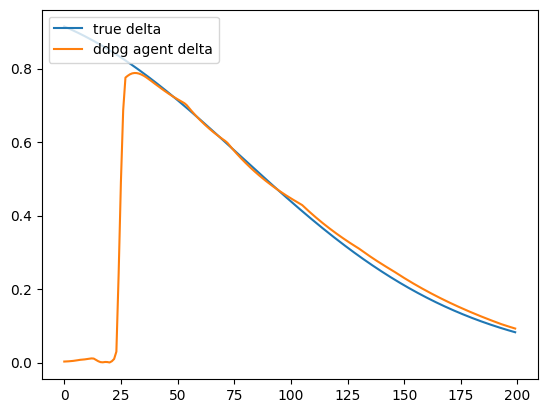

In [5]:
plt.plot(t_delta, label='true delta')
plt.plot(ddpg_agent_delta, label='ddpg agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

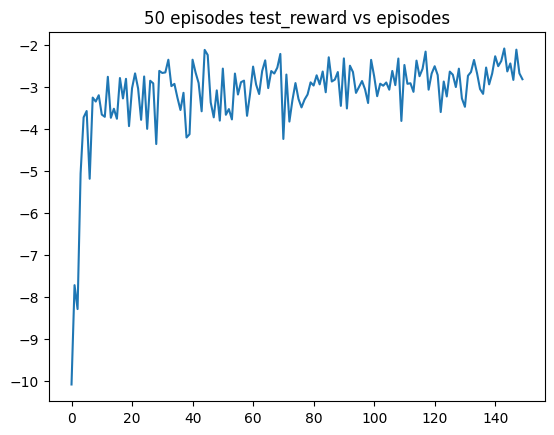

In [6]:
plt.plot(test_scores_ddpg)
plt.title('50 episodes test_reward vs episodes')

In [8]:
from SAC import SACAgent

eposide = 15000
random.seed(24)

sac_agent = SACAgent(tau=0.001)

best_test_50 = -100

test_scores_sac = []
for i in trange(eposide):

    env = GBM_stock(S0=50, K=50, rf=0.05, sigma=0.3, n_step=60)
    done = False
    already_strike = False
    score = 0
    state = env.reset()
    while not done:
        action = sac_agent.choose_action(state)
        next_state, reward, done, already_strike = env.step(action, already_strike)
        sac_agent.remember(state, action, reward, next_state, int(done))
        sac_agent.learn()
        score += reward
        state = next_state

    # score_history.append(score)
    if (i+1) % 100 == 0:
        test_50 = episodes_50_gbm_american(sac_agent, S=50, K=50, r=0.05, sigma=0.3, n_step=60)
        print('episode ', i, 'score %.2f' % score,
              '50 test average score %.2f' % test_50)

        if test_50 > best_test_50:
            best_test_50 = test_50
            sac_agent.save_models()

        test_scores_sac.append(test_50)
        if abs(test_50) < 0.1:
            print('Finish training early')
            break

  1%|▏                                    | 100/15000 [00:47<2:50:18,  1.46it/s]

exercise early average at time 33.80769230769222 early exercise ratio is 0.52
episode  99 score -38.21 50 test average score -10.00
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  1%|▍                                    | 200/15000 [01:37<2:56:29,  1.40it/s]

exercise early average at time 34.61538461538452 early exercise ratio is 0.52
episode  199 score -21.74 50 test average score -10.00


  2%|▋                                    | 300/15000 [02:25<2:50:25,  1.44it/s]

exercise early average at time 38.4999999999999 early exercise ratio is 0.52
episode  299 score -20.87 50 test average score -9.34
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  3%|▉                                    | 400/15000 [03:15<3:01:39,  1.34it/s]

exercise early average at time 42.1304347826086 early exercise ratio is 0.46
episode  399 score -16.93 50 test average score -8.15
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  3%|█▏                                   | 500/15000 [04:03<2:43:24,  1.48it/s]

exercise early average at time 39.44444444444436 early exercise ratio is 0.54
episode  499 score -21.46 50 test average score -8.86


  4%|█▍                                   | 600/15000 [04:52<2:48:16,  1.43it/s]

exercise early average at time 38.30434782608686 early exercise ratio is 0.46
episode  599 score -20.23 50 test average score -8.26


  5%|█▋                                   | 700/15000 [05:41<2:41:21,  1.48it/s]

exercise early average at time 39.15384615384606 early exercise ratio is 0.52
episode  699 score -20.53 50 test average score -8.86


  5%|█▉                                   | 800/15000 [06:29<2:41:41,  1.46it/s]

exercise early average at time 39.2499999999999 early exercise ratio is 0.4
episode  799 score -24.30 50 test average score -9.01


  6%|██▏                                  | 900/15000 [07:18<2:44:31,  1.43it/s]

exercise early average at time 40.57894736842096 early exercise ratio is 0.38
episode  899 score -22.07 50 test average score -8.11
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  7%|██▍                                 | 1000/15000 [08:06<2:37:59,  1.48it/s]

exercise early average at time 36.285714285714185 early exercise ratio is 0.42
episode  999 score -19.33 50 test average score -9.20


  7%|██▋                                 | 1100/15000 [08:54<2:36:58,  1.48it/s]

exercise early average at time 36.88888888888881 early exercise ratio is 0.36
episode  1099 score -20.29 50 test average score -8.11
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  8%|██▉                                 | 1200/15000 [09:41<2:35:46,  1.48it/s]

exercise early average at time 41.41666666666657 early exercise ratio is 0.48
episode  1199 score -19.75 50 test average score -7.80
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  9%|███                                 | 1300/15000 [10:29<2:34:50,  1.47it/s]

exercise early average at time 37.99999999999991 early exercise ratio is 0.48
episode  1299 score -20.83 50 test average score -8.69


  9%|███▎                                | 1400/15000 [11:17<2:33:45,  1.47it/s]

exercise early average at time 39.17391304347816 early exercise ratio is 0.46
episode  1399 score -19.39 50 test average score -8.39


 10%|███▌                                | 1500/15000 [12:05<2:35:54,  1.44it/s]

exercise early average at time 33.919999999999916 early exercise ratio is 0.5
episode  1499 score -18.44 50 test average score -8.57


 11%|███▊                                | 1600/15000 [12:52<2:32:19,  1.47it/s]

exercise early average at time 41.88888888888879 early exercise ratio is 0.36
episode  1599 score -20.38 50 test average score -7.68
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 11%|████                                | 1700/15000 [13:40<2:29:41,  1.48it/s]

exercise early average at time 39.399999999999906 early exercise ratio is 0.5
episode  1699 score -23.23 50 test average score -8.13


 12%|████▎                               | 1800/15000 [14:28<2:30:00,  1.47it/s]

exercise early average at time 41.428571428571324 early exercise ratio is 0.42
episode  1799 score -17.39 50 test average score -8.37


 13%|████▌                               | 1900/15000 [15:15<2:28:48,  1.47it/s]

exercise early average at time 37.217391304347736 early exercise ratio is 0.46
episode  1899 score -17.77 50 test average score -7.01
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 13%|████▊                               | 2000/15000 [16:03<2:26:54,  1.47it/s]

exercise early average at time 35.27999999999991 early exercise ratio is 0.5
episode  1999 score -18.76 50 test average score -9.21


 14%|█████                               | 2100/15000 [16:52<2:40:16,  1.34it/s]

exercise early average at time 38.33333333333325 early exercise ratio is 0.54
episode  2099 score -19.22 50 test average score -8.18


 15%|█████▎                              | 2200/15000 [17:41<2:23:51,  1.48it/s]

exercise early average at time 33.11538461538453 early exercise ratio is 0.52
episode  2199 score -24.43 50 test average score -7.39


 15%|█████▌                              | 2300/15000 [18:30<2:22:01,  1.49it/s]

exercise early average at time 37.69565217391295 early exercise ratio is 0.46
episode  2299 score -23.36 50 test average score -7.29


 16%|█████▊                              | 2400/15000 [19:20<2:21:54,  1.48it/s]

exercise early average at time 37.13636363636354 early exercise ratio is 0.44
episode  2399 score -24.16 50 test average score -8.22


 17%|██████                              | 2500/15000 [20:08<2:25:49,  1.43it/s]

exercise early average at time 37.47999999999992 early exercise ratio is 0.5
episode  2499 score -22.26 50 test average score -6.55
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 17%|██████▏                             | 2600/15000 [20:56<2:15:29,  1.53it/s]

exercise early average at time 42.708333333333236 early exercise ratio is 0.48
episode  2599 score -17.57 50 test average score -7.30


 18%|██████▍                             | 2700/15000 [21:41<2:14:23,  1.53it/s]

exercise early average at time 42.87499999999991 early exercise ratio is 0.48
episode  2699 score -21.13 50 test average score -7.45


 19%|██████▋                             | 2800/15000 [22:27<2:13:46,  1.52it/s]

exercise early average at time 40.566666666666585 early exercise ratio is 0.6
episode  2799 score -17.31 50 test average score -6.71


 19%|██████▉                             | 2900/15000 [23:12<2:15:03,  1.49it/s]

exercise early average at time 38.14814814814807 early exercise ratio is 0.54
episode  2899 score -20.97 50 test average score -6.97


 20%|███████▏                            | 3000/15000 [23:59<2:16:02,  1.47it/s]

exercise early average at time 34.545454545454454 early exercise ratio is 0.44
episode  2999 score -22.33 50 test average score -6.57


 21%|███████▍                            | 3100/15000 [24:45<2:11:03,  1.51it/s]

exercise early average at time 32.83333333333325 early exercise ratio is 0.48
episode  3099 score -21.36 50 test average score -7.07


 21%|███████▋                            | 3200/15000 [25:31<2:10:15,  1.51it/s]

exercise early average at time 35.31818181818172 early exercise ratio is 0.44
episode  3199 score -19.18 50 test average score -7.54


 22%|███████▉                            | 3300/15000 [26:16<2:08:39,  1.52it/s]

exercise early average at time 39.67999999999991 early exercise ratio is 0.5
episode  3299 score -18.48 50 test average score -7.34


 23%|████████▏                           | 3400/15000 [27:02<2:08:30,  1.50it/s]

exercise early average at time 40.95833333333324 early exercise ratio is 0.48
episode  3399 score -20.04 50 test average score -5.79
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 23%|████████▍                           | 3500/15000 [27:48<2:06:34,  1.51it/s]

exercise early average at time 38.33333333333324 early exercise ratio is 0.54
episode  3499 score -15.62 50 test average score -8.21


 24%|████████▋                           | 3600/15000 [28:34<2:06:31,  1.50it/s]

exercise early average at time 41.80769230769222 early exercise ratio is 0.52
episode  3599 score -16.11 50 test average score -7.39


 25%|████████▉                           | 3700/15000 [29:20<2:06:06,  1.49it/s]

exercise early average at time 39.78260869565208 early exercise ratio is 0.46
episode  3699 score -15.70 50 test average score -6.89


 25%|█████████                           | 3800/15000 [30:07<2:02:59,  1.52it/s]

exercise early average at time 33.30434782608687 early exercise ratio is 0.46
episode  3799 score -24.72 50 test average score -5.25
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 26%|█████████▎                          | 3900/15000 [30:52<2:00:55,  1.53it/s]

exercise early average at time 33.26923076923068 early exercise ratio is 0.52
episode  3899 score -14.82 50 test average score -6.37


 27%|█████████▌                          | 4000/15000 [31:38<1:59:51,  1.53it/s]

exercise early average at time 36.04761904761896 early exercise ratio is 0.42
episode  3999 score -22.74 50 test average score -6.69


 27%|█████████▊                          | 4100/15000 [32:24<2:01:25,  1.50it/s]

exercise early average at time 38.04999999999991 early exercise ratio is 0.4
episode  4099 score -17.27 50 test average score -5.08
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 28%|██████████                          | 4200/15000 [33:10<2:01:28,  1.48it/s]

exercise early average at time 40.5357142857142 early exercise ratio is 0.56
episode  4199 score -20.84 50 test average score -7.19


 29%|██████████▎                         | 4300/15000 [33:57<1:59:08,  1.50it/s]

exercise early average at time 37.919999999999916 early exercise ratio is 0.5
episode  4299 score -23.77 50 test average score -6.90


 29%|██████████▌                         | 4400/15000 [34:44<1:58:29,  1.49it/s]

exercise early average at time 34.56521739130425 early exercise ratio is 0.46
episode  4399 score -20.03 50 test average score -6.65


 30%|██████████▊                         | 4500/15000 [35:32<2:03:04,  1.42it/s]

exercise early average at time 34.16666666666658 early exercise ratio is 0.48
episode  4499 score -18.09 50 test average score -7.27


 31%|███████████                         | 4600/15000 [36:20<2:00:28,  1.44it/s]

exercise early average at time 39.78571428571421 early exercise ratio is 0.56
episode  4599 score -15.50 50 test average score -7.25


 31%|███████████▎                        | 4700/15000 [37:08<1:56:22,  1.48it/s]

exercise early average at time 38.69565217391295 early exercise ratio is 0.46
episode  4699 score -18.68 50 test average score -6.03


 32%|███████████▌                        | 4800/15000 [37:56<1:59:53,  1.42it/s]

exercise early average at time 41.11111111111101 early exercise ratio is 0.36
episode  4799 score -21.28 50 test average score -5.28


 33%|███████████▊                        | 4900/15000 [38:43<1:53:26,  1.48it/s]

exercise early average at time 37.13636363636354 early exercise ratio is 0.44
episode  4899 score -20.51 50 test average score -6.80


 33%|████████████                        | 5000/15000 [39:30<1:52:42,  1.48it/s]

exercise early average at time 38.947368421052545 early exercise ratio is 0.38
episode  4999 score -15.37 50 test average score -5.93


 34%|████████████▏                       | 5100/15000 [40:17<1:52:28,  1.47it/s]

exercise early average at time 38.624999999999915 early exercise ratio is 0.48
episode  5099 score -16.78 50 test average score -6.57


 35%|████████████▍                       | 5200/15000 [41:04<1:49:20,  1.49it/s]

exercise early average at time 39.269230769230674 early exercise ratio is 0.52
episode  5199 score -15.10 50 test average score -6.89


 35%|████████████▋                       | 5300/15000 [41:51<1:50:03,  1.47it/s]

exercise early average at time 32.79999999999991 early exercise ratio is 0.6
episode  5299 score -21.32 50 test average score -6.28


 36%|████████████▉                       | 5400/15000 [42:37<1:44:51,  1.53it/s]

exercise early average at time 37.58333333333324 early exercise ratio is 0.48
episode  5399 score -20.34 50 test average score -6.66


 37%|█████████████▏                      | 5500/15000 [43:23<1:43:55,  1.52it/s]

exercise early average at time 37.99999999999991 early exercise ratio is 0.42
episode  5499 score -17.53 50 test average score -6.04


 37%|█████████████▍                      | 5600/15000 [44:10<1:43:34,  1.51it/s]

exercise early average at time 32.66666666666658 early exercise ratio is 0.48
episode  5599 score -16.02 50 test average score -5.87


 38%|█████████████▋                      | 5700/15000 [44:55<1:41:18,  1.53it/s]

exercise early average at time 41.49999999999991 early exercise ratio is 0.48
episode  5699 score -16.26 50 test average score -6.59


 39%|█████████████▉                      | 5800/15000 [45:41<1:47:39,  1.42it/s]

exercise early average at time 41.87999999999991 early exercise ratio is 0.5
episode  5799 score -23.88 50 test average score -6.59


 39%|██████████████▏                     | 5900/15000 [46:28<1:43:13,  1.47it/s]

exercise early average at time 40.74999999999991 early exercise ratio is 0.48
episode  5899 score -20.50 50 test average score -6.23


 40%|██████████████▍                     | 6000/15000 [47:15<1:44:25,  1.44it/s]

exercise early average at time 43.51999999999991 early exercise ratio is 0.5
episode  5999 score -19.85 50 test average score -6.34


 41%|██████████████▋                     | 6100/15000 [48:04<1:44:53,  1.41it/s]

exercise early average at time 41.99999999999992 early exercise ratio is 0.52
episode  6099 score -16.00 50 test average score -6.32


 41%|██████████████▉                     | 6200/15000 [48:50<1:41:55,  1.44it/s]

exercise early average at time 41.1499999999999 early exercise ratio is 0.4
episode  6199 score -14.52 50 test average score -6.31


 42%|███████████████                     | 6300/15000 [49:36<1:37:21,  1.49it/s]

exercise early average at time 34.90909090909082 early exercise ratio is 0.44
episode  6299 score -20.64 50 test average score -5.52


 43%|███████████████▎                    | 6400/15000 [50:22<1:35:01,  1.51it/s]

exercise early average at time 42.33333333333324 early exercise ratio is 0.42
episode  6399 score -20.84 50 test average score -6.43


 43%|███████████████▌                    | 6500/15000 [51:07<1:32:37,  1.53it/s]

exercise early average at time 38.0999999999999 early exercise ratio is 0.4
episode  6499 score -22.28 50 test average score -6.48


 44%|███████████████▊                    | 6600/15000 [51:53<1:31:25,  1.53it/s]

exercise early average at time 34.63333333333324 early exercise ratio is 0.6
episode  6599 score -19.18 50 test average score -5.73


 45%|████████████████                    | 6700/15000 [52:38<1:31:06,  1.52it/s]

exercise early average at time 40.05263157894727 early exercise ratio is 0.38
episode  6699 score -24.73 50 test average score -5.63


 45%|████████████████▎                   | 6800/15000 [53:24<1:30:20,  1.51it/s]

exercise early average at time 39.94117647058814 early exercise ratio is 0.34
episode  6799 score -27.03 50 test average score -5.32


 46%|████████████████▌                   | 6900/15000 [54:10<1:29:47,  1.50it/s]

exercise early average at time 42.4374999999999 early exercise ratio is 0.32
episode  6899 score -19.86 50 test average score -4.49
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 47%|████████████████▊                   | 7000/15000 [54:56<1:29:50,  1.48it/s]

exercise early average at time 42.07999999999992 early exercise ratio is 0.5
episode  6999 score -19.06 50 test average score -6.62


 47%|█████████████████                   | 7100/15000 [55:41<1:27:04,  1.51it/s]

exercise early average at time 42.17647058823519 early exercise ratio is 0.34
episode  7099 score -16.72 50 test average score -5.67


 48%|█████████████████▎                  | 7200/15000 [56:27<1:25:01,  1.53it/s]

exercise early average at time 34.304347826086875 early exercise ratio is 0.46
episode  7199 score -25.34 50 test average score -7.02


 49%|█████████████████▌                  | 7300/15000 [57:12<1:24:21,  1.52it/s]

exercise early average at time 42.759999999999906 early exercise ratio is 0.5
episode  7299 score -21.68 50 test average score -6.27


 49%|█████████████████▊                  | 7400/15000 [57:57<1:23:31,  1.52it/s]

exercise early average at time 37.04347826086946 early exercise ratio is 0.46
episode  7399 score -18.63 50 test average score -6.41


 50%|██████████████████                  | 7500/15000 [58:43<1:22:32,  1.51it/s]

exercise early average at time 36.260869565217305 early exercise ratio is 0.46
episode  7499 score -16.65 50 test average score -5.51


 51%|██████████████████▏                 | 7600/15000 [59:28<1:22:43,  1.49it/s]

exercise early average at time 38.66666666666657 early exercise ratio is 0.54
episode  7599 score -17.72 50 test average score -6.11


 51%|█████████████████▍                | 7700/15000 [1:00:14<1:19:46,  1.52it/s]

exercise early average at time 40.178571428571345 early exercise ratio is 0.56
episode  7699 score -26.14 50 test average score -7.46


 52%|█████████████████▋                | 7800/15000 [1:00:59<1:18:55,  1.52it/s]

exercise early average at time 44.9999999999999 early exercise ratio is 0.44
episode  7799 score -15.77 50 test average score -5.17


 53%|█████████████████▉                | 7900/15000 [1:01:45<1:17:50,  1.52it/s]

exercise early average at time 34.77777777777769 early exercise ratio is 0.54
episode  7899 score -16.65 50 test average score -5.77


 53%|██████████████████▏               | 8000/15000 [1:02:30<1:16:01,  1.53it/s]

exercise early average at time 34.26923076923069 early exercise ratio is 0.52
episode  7999 score -20.22 50 test average score -6.08


 54%|██████████████████▎               | 8100/15000 [1:03:16<1:15:01,  1.53it/s]

exercise early average at time 37.23333333333325 early exercise ratio is 0.6
episode  8099 score -19.14 50 test average score -5.56


 55%|██████████████████▌               | 8200/15000 [1:04:01<1:16:01,  1.49it/s]

exercise early average at time 35.26315789473674 early exercise ratio is 0.38
episode  8199 score -15.88 50 test average score -4.86


 55%|██████████████████▊               | 8300/15000 [1:04:46<1:12:56,  1.53it/s]

exercise early average at time 40.91999999999991 early exercise ratio is 0.5
episode  8299 score -17.05 50 test average score -6.68


 56%|███████████████████               | 8400/15000 [1:05:33<1:13:03,  1.51it/s]

exercise early average at time 41.81481481481473 early exercise ratio is 0.54
episode  8399 score -17.54 50 test average score -7.21


 57%|███████████████████▎              | 8500/15000 [1:06:18<1:11:23,  1.52it/s]

exercise early average at time 39.29166666666657 early exercise ratio is 0.48
episode  8499 score -17.21 50 test average score -6.06


 57%|███████████████████▍              | 8600/15000 [1:07:04<1:10:37,  1.51it/s]

exercise early average at time 34.53333333333324 early exercise ratio is 0.3
episode  8599 score -17.03 50 test average score -4.83


 58%|███████████████████▋              | 8700/15000 [1:07:50<1:09:36,  1.51it/s]

exercise early average at time 41.11538461538453 early exercise ratio is 0.52
episode  8699 score -17.71 50 test average score -5.55


 59%|███████████████████▉              | 8800/15000 [1:08:36<1:08:11,  1.52it/s]

exercise early average at time 36.73913043478252 early exercise ratio is 0.46
episode  8799 score -18.30 50 test average score -7.31


 59%|████████████████████▏             | 8900/15000 [1:09:22<1:08:00,  1.49it/s]

exercise early average at time 39.59090909090899 early exercise ratio is 0.44
episode  8899 score -24.91 50 test average score -7.18


 60%|████████████████████▍             | 9000/15000 [1:10:07<1:06:25,  1.51it/s]

exercise early average at time 30.849999999999916 early exercise ratio is 0.4
episode  8999 score -19.20 50 test average score -5.44


 61%|████████████████████▋             | 9100/15000 [1:10:53<1:05:11,  1.51it/s]

exercise early average at time 38.73913043478252 early exercise ratio is 0.46
episode  9099 score -20.89 50 test average score -6.64


 61%|████████████████████▊             | 9200/15000 [1:11:39<1:03:05,  1.53it/s]

exercise early average at time 42.91666666666657 early exercise ratio is 0.48
episode  9199 score -15.50 50 test average score -6.61


 62%|█████████████████████             | 9300/15000 [1:12:24<1:01:47,  1.54it/s]

exercise early average at time 35.761904761904674 early exercise ratio is 0.42
episode  9299 score -19.65 50 test average score -5.84


 63%|█████████████████████▎            | 9400/15000 [1:13:09<1:00:47,  1.54it/s]

exercise early average at time 36.9999999999999 early exercise ratio is 0.42
episode  9399 score -18.82 50 test average score -6.73


 63%|█████████████████████▌            | 9500/15000 [1:13:54<1:00:02,  1.53it/s]

exercise early average at time 39.37499999999991 early exercise ratio is 0.48
episode  9499 score -23.76 50 test average score -6.55


 64%|█████████████████████▊            | 9600/15000 [1:14:40<1:02:36,  1.44it/s]

exercise early average at time 36.47368421052622 early exercise ratio is 0.38
episode  9599 score -19.30 50 test average score -6.42


 65%|███████████████████████▎            | 9700/15000 [1:15:27<59:52,  1.48it/s]

exercise early average at time 34.8799999999999 early exercise ratio is 0.5
episode  9699 score -25.19 50 test average score -6.48


 65%|███████████████████████▌            | 9800/15000 [1:16:13<56:49,  1.53it/s]

exercise early average at time 33.3529411764705 early exercise ratio is 0.34
episode  9799 score -16.35 50 test average score -7.42


 66%|███████████████████████▊            | 9900/15000 [1:16:59<55:26,  1.53it/s]

exercise early average at time 36.346153846153754 early exercise ratio is 0.52
episode  9899 score -17.34 50 test average score -6.55


 67%|███████████████████████▎           | 10000/15000 [1:17:44<54:37,  1.53it/s]

exercise early average at time 39.8695652173912 early exercise ratio is 0.46
episode  9999 score -21.05 50 test average score -7.04


 67%|███████████████████████▌           | 10100/15000 [1:18:29<53:00,  1.54it/s]

exercise early average at time 33.71428571428562 early exercise ratio is 0.56
episode  10099 score -20.85 50 test average score -5.54


 68%|███████████████████████▊           | 10200/15000 [1:19:15<52:43,  1.52it/s]

exercise early average at time 36.79999999999991 early exercise ratio is 0.4
episode  10199 score -18.27 50 test average score -6.39


 69%|████████████████████████           | 10300/15000 [1:20:00<52:30,  1.49it/s]

exercise early average at time 42.56521739130425 early exercise ratio is 0.46
episode  10299 score -18.42 50 test average score -6.49


 69%|████████████████████████▎          | 10400/15000 [1:20:45<50:13,  1.53it/s]

exercise early average at time 40.899999999999906 early exercise ratio is 0.4
episode  10399 score -22.02 50 test average score -6.97


 70%|████████████████████████▌          | 10500/15000 [1:21:30<49:51,  1.50it/s]

exercise early average at time 39.04347826086946 early exercise ratio is 0.46
episode  10499 score -20.42 50 test average score -6.29


 71%|████████████████████████▋          | 10600/15000 [1:22:17<48:55,  1.50it/s]

exercise early average at time 36.69565217391295 early exercise ratio is 0.46
episode  10599 score -21.90 50 test average score -5.27


 71%|████████████████████████▉          | 10700/15000 [1:23:04<49:05,  1.46it/s]

exercise early average at time 36.8709677419354 early exercise ratio is 0.62
episode  10699 score -24.41 50 test average score -6.94


 72%|█████████████████████████▏         | 10800/15000 [1:23:52<46:16,  1.51it/s]

exercise early average at time 37.21428571428562 early exercise ratio is 0.56
episode  10799 score -23.18 50 test average score -5.59


 73%|█████████████████████████▍         | 10900/15000 [1:24:39<47:53,  1.43it/s]

exercise early average at time 36.227272727272634 early exercise ratio is 0.44
episode  10899 score -20.46 50 test average score -5.52


 73%|█████████████████████████▋         | 11000/15000 [1:25:26<48:10,  1.38it/s]

exercise early average at time 43.9999999999999 early exercise ratio is 0.28
episode  10999 score -23.14 50 test average score -4.85


 74%|█████████████████████████▉         | 11100/15000 [1:26:12<43:03,  1.51it/s]

exercise early average at time 40.99999999999991 early exercise ratio is 0.38
episode  11099 score -17.15 50 test average score -5.30


 75%|██████████████████████████▏        | 11200/15000 [1:26:57<44:30,  1.42it/s]

exercise early average at time 39.94117647058813 early exercise ratio is 0.34
episode  11199 score -14.71 50 test average score -5.99


 75%|██████████████████████████▎        | 11300/15000 [1:27:45<42:12,  1.46it/s]

exercise early average at time 36.74193548387089 early exercise ratio is 0.62
episode  11299 score -17.07 50 test average score -5.51


 76%|██████████████████████████▌        | 11400/15000 [1:28:31<40:07,  1.50it/s]

exercise early average at time 38.99999999999991 early exercise ratio is 0.56
episode  11399 score -16.87 50 test average score -6.12


 77%|██████████████████████████▊        | 11500/15000 [1:29:19<40:20,  1.45it/s]

exercise early average at time 39.87999999999991 early exercise ratio is 0.5
episode  11499 score -16.74 50 test average score -6.69


 77%|███████████████████████████        | 11600/15000 [1:30:06<38:45,  1.46it/s]

exercise early average at time 33.71428571428562 early exercise ratio is 0.42
episode  11599 score -16.88 50 test average score -6.27


 78%|███████████████████████████▎       | 11700/15000 [1:30:53<37:24,  1.47it/s]

exercise early average at time 38.45454545454537 early exercise ratio is 0.66
episode  11699 score -23.19 50 test average score -6.49


 79%|███████████████████████████▌       | 11800/15000 [1:31:40<35:16,  1.51it/s]

exercise early average at time 41.09999999999991 early exercise ratio is 0.4
episode  11799 score -14.59 50 test average score -5.97


 79%|███████████████████████████▊       | 11900/15000 [1:32:26<34:33,  1.49it/s]

exercise early average at time 38.08333333333324 early exercise ratio is 0.48
episode  11899 score -19.32 50 test average score -5.75


 80%|████████████████████████████       | 12000/15000 [1:33:13<33:07,  1.51it/s]

exercise early average at time 40.904761904761806 early exercise ratio is 0.42
episode  11999 score -19.00 50 test average score -6.00


 81%|████████████████████████████▏      | 12100/15000 [1:33:58<31:32,  1.53it/s]

exercise early average at time 39.27999999999991 early exercise ratio is 0.5
episode  12099 score -20.52 50 test average score -5.49


 81%|████████████████████████████▍      | 12200/15000 [1:34:44<30:41,  1.52it/s]

exercise early average at time 41.590909090909 early exercise ratio is 0.44
episode  12199 score -17.38 50 test average score -6.30


 82%|████████████████████████████▋      | 12300/15000 [1:35:30<30:16,  1.49it/s]

exercise early average at time 36.60869565217381 early exercise ratio is 0.46
episode  12299 score -16.97 50 test average score -6.40


 83%|████████████████████████████▉      | 12400/15000 [1:36:16<29:06,  1.49it/s]

exercise early average at time 42.85185185185177 early exercise ratio is 0.54
episode  12399 score -18.09 50 test average score -7.03


 83%|█████████████████████████████▏     | 12500/15000 [1:37:03<28:40,  1.45it/s]

exercise early average at time 32.649999999999906 early exercise ratio is 0.4
episode  12499 score -21.64 50 test average score -5.57


 84%|█████████████████████████████▍     | 12600/15000 [1:37:49<25:58,  1.54it/s]

exercise early average at time 36.03703703703695 early exercise ratio is 0.54
episode  12599 score -18.23 50 test average score -6.20


 85%|█████████████████████████████▋     | 12700/15000 [1:38:35<25:11,  1.52it/s]

exercise early average at time 34.96428571428562 early exercise ratio is 0.56
episode  12699 score -20.19 50 test average score -6.14


 85%|█████████████████████████████▊     | 12800/15000 [1:39:22<25:11,  1.46it/s]

exercise early average at time 38.19999999999992 early exercise ratio is 0.6
episode  12799 score -21.81 50 test average score -5.26


 86%|██████████████████████████████     | 12900/15000 [1:40:08<22:39,  1.55it/s]

exercise early average at time 38.29999999999992 early exercise ratio is 0.6
episode  12899 score -17.63 50 test average score -6.39


 87%|██████████████████████████████▎    | 13000/15000 [1:40:54<22:01,  1.51it/s]

exercise early average at time 40.434782608695556 early exercise ratio is 0.46
episode  12999 score -17.70 50 test average score -5.23


 87%|██████████████████████████████▌    | 13100/15000 [1:41:40<21:18,  1.49it/s]

exercise early average at time 37.33333333333325 early exercise ratio is 0.6
episode  13099 score -14.09 50 test average score -6.79


 88%|██████████████████████████████▊    | 13200/15000 [1:42:26<19:48,  1.51it/s]

exercise early average at time 41.86956521739121 early exercise ratio is 0.46
episode  13199 score -19.92 50 test average score -6.37


 89%|███████████████████████████████    | 13300/15000 [1:43:13<19:21,  1.46it/s]

exercise early average at time 43.9999999999999 early exercise ratio is 0.46
episode  13299 score -13.90 50 test average score -6.22


 89%|███████████████████████████████▎   | 13400/15000 [1:44:00<17:55,  1.49it/s]

exercise early average at time 38.25925925925917 early exercise ratio is 0.54
episode  13399 score -19.06 50 test average score -6.47


 90%|███████████████████████████████▌   | 13500/15000 [1:44:46<16:55,  1.48it/s]

exercise early average at time 41.22222222222212 early exercise ratio is 0.36
episode  13499 score -21.16 50 test average score -6.03


 91%|███████████████████████████████▋   | 13600/15000 [1:45:33<16:13,  1.44it/s]

exercise early average at time 43.63636363636354 early exercise ratio is 0.44
episode  13599 score -20.87 50 test average score -5.47


 91%|███████████████████████████████▉   | 13700/15000 [1:46:19<15:19,  1.41it/s]

exercise early average at time 41.13636363636354 early exercise ratio is 0.44
episode  13699 score -17.40 50 test average score -5.24


 92%|████████████████████████████████▏  | 13800/15000 [1:47:06<13:08,  1.52it/s]

exercise early average at time 36.549999999999905 early exercise ratio is 0.4
episode  13799 score -19.60 50 test average score -5.30


 93%|████████████████████████████████▍  | 13900/15000 [1:47:53<12:48,  1.43it/s]

exercise early average at time 34.36842105263149 early exercise ratio is 0.38
episode  13899 score -17.95 50 test average score -6.05


 93%|████████████████████████████████▋  | 14000/15000 [1:48:39<11:11,  1.49it/s]

exercise early average at time 39.409090909090814 early exercise ratio is 0.44
episode  13999 score -25.07 50 test average score -6.34


 94%|████████████████████████████████▉  | 14100/15000 [1:49:25<09:50,  1.52it/s]

exercise early average at time 36.357142857142776 early exercise ratio is 0.56
episode  14099 score -16.45 50 test average score -5.29


 95%|█████████████████████████████████▏ | 14200/15000 [1:50:12<09:15,  1.44it/s]

exercise early average at time 42.07142857142848 early exercise ratio is 0.28
episode  14199 score -17.80 50 test average score -5.65


 95%|█████████████████████████████████▎ | 14300/15000 [1:50:58<08:04,  1.45it/s]

exercise early average at time 39.81818181818171 early exercise ratio is 0.44
episode  14299 score -18.46 50 test average score -5.11


 96%|█████████████████████████████████▌ | 14400/15000 [1:51:46<06:46,  1.47it/s]

exercise early average at time 34.19999999999991 early exercise ratio is 0.3
episode  14399 score -16.52 50 test average score -4.90


 97%|█████████████████████████████████▊ | 14500/15000 [1:52:33<05:51,  1.42it/s]

exercise early average at time 34.14285714285705 early exercise ratio is 0.56
episode  14499 score -17.30 50 test average score -6.31


 97%|██████████████████████████████████ | 14600/15000 [1:53:20<04:33,  1.46it/s]

exercise early average at time 38.0357142857142 early exercise ratio is 0.56
episode  14599 score -21.96 50 test average score -6.34


 98%|██████████████████████████████████▎| 14700/15000 [1:54:08<03:20,  1.49it/s]

exercise early average at time 36.578947368420955 early exercise ratio is 0.38
episode  14699 score -17.30 50 test average score -5.72


 99%|██████████████████████████████████▌| 14800/15000 [1:54:56<02:15,  1.48it/s]

exercise early average at time 40.1999999999999 early exercise ratio is 0.4
episode  14799 score -18.75 50 test average score -5.77


 99%|██████████████████████████████████▊| 14900/15000 [1:55:44<01:07,  1.48it/s]

exercise early average at time 31.649999999999913 early exercise ratio is 0.4
episode  14899 score -22.67 50 test average score -5.96


100%|███████████████████████████████████| 15000/15000 [1:56:31<00:00,  2.15it/s]

exercise early average at time 38.299999999999905 early exercise ratio is 0.4
episode  14999 score -17.54 50 test average score -6.04


In [9]:
import pickle
torch.save(sac_agent, r'./final_sac_agent_gbm_american.pth')
open_file = open('./test_scores_sac_gbm_american.pkl', "wb")
pickle.dump(test_scores_sac, open_file)
open_file.close()

In [10]:
sac_agent.load_models()
T = 60 / 252
t_delta = []
sac_agent_delta = []
for i in range(400, 600):
    St = i/10
    env = GBM_stock(S0=St, K=50, rf=0.05, sigma=0.3, n_step=60)
    t_delta.append(np.abs(env.put_delta(S=St, K=50, r=0.05, sigma=0.3, tau=T)))
    observation = [T, St]
    sac_agent_delta.append(sac_agent.final_action(observation))

--- loading models ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---


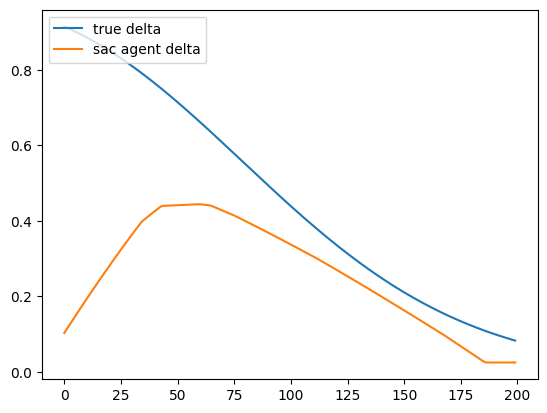

In [11]:
plt.plot(t_delta, label='true delta')
plt.plot(sac_agent_delta, label='sac agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

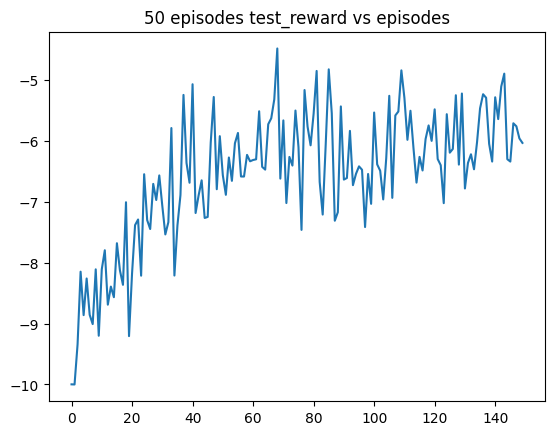

In [12]:
plt.plot(test_scores_sac)
plt.title('50 episodes test_reward vs episodes')

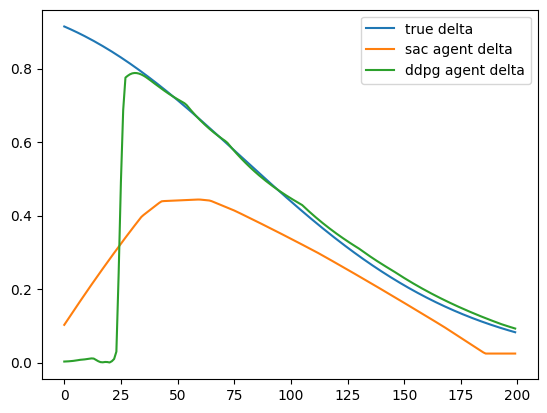

In [13]:
plt.plot(t_delta, label='true delta')
plt.plot(sac_agent_delta, label='sac agent delta')
plt.plot(ddpg_agent_delta, label='ddpg agent delta')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

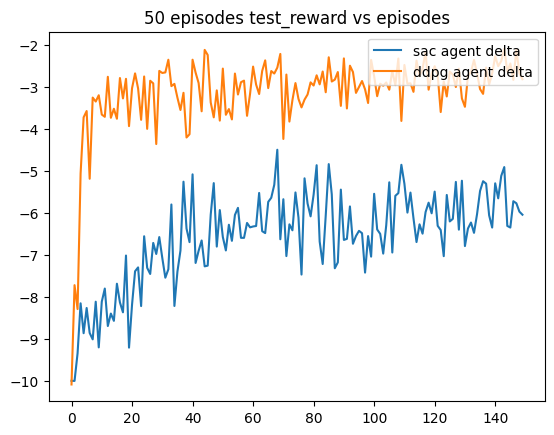

In [14]:
plt.plot(test_scores_sac, label='sac agent delta')
plt.plot(test_scores_ddpg, label='ddpg agent delta')
plt.legend(loc='upper right')
plt.title('50 episodes test_reward vs episodes')